Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


100%|██████████| 29642/29642 [00:01<00:00, 18128.97it/s]


Found 29636 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_gener

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)      

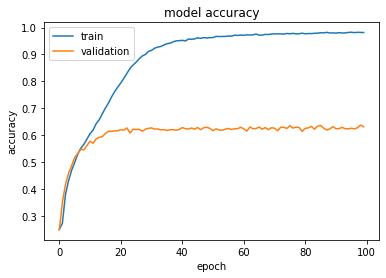

In [ ]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#import path
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import zipfile
from google.colab import drive
from matplotlib import pyplot as plt
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset job13-2.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()
training_dir = "train"
testing_dir = "test"
Y = []
t_angry = ["/content/dataset job13-2/train/angry".format(i) for i in os.listdir("/content/dataset job13-2/train/angry")]
for im in t_angry:
    Y.append(0)
t_disgust = ["/content/dataset job13-2/train/disgust/{}".format(i) for i in os.listdir("/content/dataset job13-2/train/disgust/")]
for im in t_disgust:
    Y.append(1)
t_fear = ["/content/dataset job13-2/train/fear/{}".format(i) for i in os.listdir("/content/dataset job13-2/train/fear/")]
for im in t_fear:
    Y.append(2)
t_happy = ["/content/dataset job13-2/train/happy/{}".format(i) for i in os.listdir("/content/dataset job13-2/train/happy/")]
for im in t_happy:
    Y.append(3)
t_neutral = ["/content/dataset job13-2/train/neutral/{}".format(i) for i in os.listdir("/content/dataset job13-2/train/neutral/")]
for im in t_neutral:
    Y.append(4)
t_sad= ["/content/dataset job13-2/train/sad/{}".format(i) for i in os.listdir("/content/dataset job13-2/train/sad/")]
for im in t_sad:
    Y.append(5)
t_surprise= ["/content/dataset job13-2/train/surprise/{}".format(i) for i in os.listdir("/content/dataset job13-2/train/surprise/")]
for im in t_surprise:
    Y.append(6)
train_imgs = t_angry + t_disgust + t_fear + t_happy + t_neutral + t_sad + t_surprise
#test_imgs = ["/content/test/"+f+"/"+i for f in os.listdir("test") for i in os.listdir("test/"+f)]
random.shuffle(train_imgs)
nrows = 48
ncolumns = 48
ch = 3
X = []
for im in tqdm(train_imgs):
    X.append(cv2.imread(im))
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.1,random_state=2)

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory("/content/dataset job13-2/train",
                                                    batch_size=128,
                                                    color_mode="grayscale",
                                                    class_mode="categorical",
                                                    target_size=(48,48),
                                                    shuffle=True)
test_generator = test_datagen.flow_from_directory("/content/dataset job13-2/test",
                                                  batch_size=128,
                                                    color_mode="grayscale",
                                                    class_mode="categorical",
                                                    target_size=(48,48),
                                                    shuffle=False)
model = Sequential()
model.add(Conv2D(input_shape=(48,48,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Dense(1024,activation="relu"))
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.50))

model.add(Flatten())

model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(7,activation="softmax"))
adam = Adam(lr=0.0001)

model.compile(optimizer=adam,loss="categorical_crossentropy",metrics = ['accuracy'])
model.summary()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
y_train= to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
history = model.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator,
                              steps_per_epoch=train_generator.n//train_generator.batch_size,
                              validation_steps=test_generator.n//test_generator.batch_size)
model.save("model.exp")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()

In [ ]:
model.load_weights('model.exp')

predicted_classes = model.predict_classes(test_generator)

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = test_generator.classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F-Score', ascending=False, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results



In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())


Overall Categorical Accuracy: 62.79%


,Precision,Recall,F-Score,Support
happy,0.836142,0.811161,0.823462,1774.0
surprise,0.785714,0.767750,0.776628,831.0
disgust,0.784810,0.558559,0.652632,111.0
neutral,0.558824,0.570154,0.564432,1233.0
angry,0.544385,0.531315,0.537771,958.0
sad,0.471826,0.557338,0.511029,1247.0
fear,0.512222,0.450195,0.479210,1024.0


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os
from keras.preprocessing.image import img_to_array
from os import path
from keras.models import load_model
import numpy as np
from google.colab.patches import cv2_imshow
from base64 import b64encode
import cv2
import PIL
import io
import html
import time
if path.exists("res") == False:
  os.mkdir("res")
  os.mkdir("res/angry")
  os.mkdir("res/fear")
  os.mkdir("res/neutral")
model = load_model("model.exp")
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]
def js_to_image(js_res):
  image_bytes = b64decode(js_res.split(",")[1])
  jpg_as_np = np.frombuffer(image_bytes,dtype=np.int8)
  img = cv2.imdecode(jpg_as_np,flags=1)
  return img
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data
# start streaming video from webcam


video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
i=0
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # get face region coordinates
    faces = face_cascade.detectMultiScale(img)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
        cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),3)
        roi_gray = img[y:y+w,x:x+h]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            img_px = img_to_array(roi_gray)
            img_px = np.expand_dims(img_px,axis=0)
            pred = model.predict(img_px)
            max_in = np.argmax(pred[0])
            label = labels[max_in]
            label_pos = (x,y-10)
            cv2.putText(bbox_array,label,label_pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            folder = ""
            if max_in == 0:
                folder = "angry"
                cv2.imwrite("res/"+folder+"/myImg"+str(i)+".jpg",img)
            elif max_in == 2:
                folder = "fear"
                cv2.imwrite("res/"+folder+"/myImg"+str(i)+".jpg",img)
            elif max_in == 4:
                folder = "neutral"
                cv2.imwrite("res/"+folder+"/myImg"+str(i)+".jpg",img)
            i = i+1
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>